In [1]:
# coding:utf-8

import pandas as pd
import numpy as np
import os,sys
from multiprocessing import Pool
import matplotlib.pyplot as plt

In [35]:
xtest = pd.read_csv('../datas/xtest')
xtest.head()

,is_risk,rowkey,y
0,1,946196,0.843248
1,1,946195,0.822768
2,1,946198,0.811135
3,1,923741,0.777318
4,0,849304,0.708222


In [47]:
xh = xtest.head()

In [50]:
dict(xh['is_risk'].value_counts())

{0: 1, 1: 4}

In [46]:
xtest.loc[:0]

,is_risk,rowkey,y,s,recall,precision,f
0,1,946196,0.843248,1.0,0.004926,1.0,0.333333


In [44]:
#xtest.sort_values('y', ascending=False)

In [42]:
#xtest.index.tolist()

In [21]:
xtest.shape

(19499, 3)

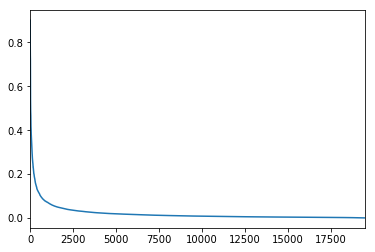

In [20]:
xtest.y.plot()
plt.show()

In [23]:
xs = xtest[xtest['is_risk']==1].shape[0]
xs

203

In [36]:
s = [xtest.loc[0].is_risk]
n =1
prec = [xtest.loc[0].is_risk/n]
for i in xtest.index[1:]:
    n += 1
    s.append(xtest.loc[i].is_risk + s[-1])
    prec.append(1.0*s[-1]/n)
print s

[1.0, 2.0, 3.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 8.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 11.0, 11.0, 11.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 14.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 16.0, 16.0, 16.0, 17.0, 18.0, 18.0, 19.0, 19.0, 19.0, 19.0, 20.0, 21.0, 21.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22

In [37]:
xtest['s'] = s
xtest['recall'] = 1.0*xtest['s']/xs
xtest['precision'] = prec
xtest['f'] =(1+0.1*0.1)*xtest['precision']*xtest['recall']/(0.1*0.1*xtest['precision']+xtest['recall'])
xtest.head()

,is_risk,rowkey,y,s,recall,precision,f
0,1,946196,0.843248,1.0,0.004926,1.0,0.333333
1,1,946195,0.822768,2.0,0.009852,1.0,0.501241
2,1,946198,0.811135,3.0,0.014778,1.0,0.602386
3,1,923741,0.777318,4.0,0.019704,1.0,0.669983
4,0,849304,0.708222,4.0,0.019704,0.8,0.574680


In [40]:
xtest.head(20)

,is_risk,rowkey,y,s,recall,precision,f
0,1,946196,0.843248,1.0,0.004926,1.000000,0.333333
1,1,946195,0.822768,2.0,0.009852,1.000000,0.501241
2,1,946198,0.811135,3.0,0.014778,1.000000,0.602386
3,1,923741,0.777318,4.0,0.019704,1.000000,0.669983
4,0,849304,0.708222,4.0,0.019704,0.800000,0.574680
5,1,923742,0.708108,5.0,0.024631,0.833333,0.628892
6,0,849783,0.662989,5.0,0.024631,0.714286,0.559247
7,0,850072,0.605270,5.0,0.024631,0.625000,0.503490
8,0,871344,0.593771,5.0,0.024631,0.555556,0.457842
9,1,918818,0.579521,6.0,0.029557,0.600000,0.503741


In [38]:
xtest.f.max()

0.66998341625207292

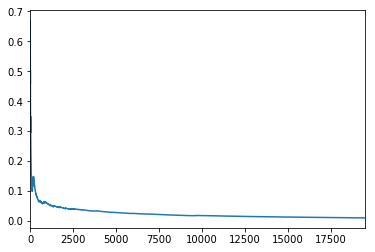

In [39]:
xtest.f.plot()
plt.show()

In [18]:
xtest.shape

(113220, 5)

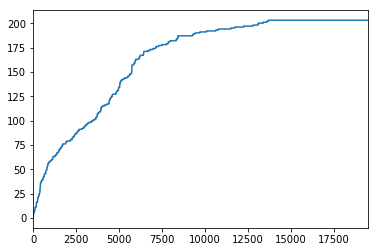

In [26]:
xtest.s.plot()
plt.show()

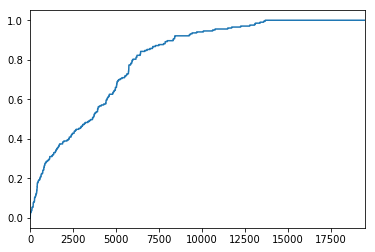

In [27]:
xtest.srate.plot()
plt.show()